### This simulation is for Jupiter-Like Gas Giants around stars within 30pc

In [1]:
import EXOSIMS
import EXOSIMS.MissionSim
import os.path
import numpy as np
import jason
import EXOSIMS.SimulatedUniverse.SAG13Universe
import EXOSIMS.SimulatedUniverse.KeplerLikeUniverse
import EXOSIMS.SimulatedUniverse.KnownRVPlanetsUniverse
import EXOSIMS.SimulatedUniverse.DulzPlavchanUniverse
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support
from EXOSIMS.StarCatalog import EXOCAT1
from astropy import units as u

#reset config of plots
SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 17

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#astropy quantity support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x27d954db6a0>

In [2]:
#setup simulation
#a detailed describition is in readme.pdf
specs = {"modules": {
      "PlanetPopulation": "JupiterTwin",
      "StarCatalog": "EXOCAT1",
      "OpticalSystem": "Nemati",
      "ZodiacalLight": "Stark",
      "BackgroundSources": " ",
      "PlanetPhysicalModel": "FortneyMarleyCahoyMix1",
      "PostProcessing": " ",
      "Completeness": " ",
      "TargetList": " ",
      "SimulatedUniverse": "SAG13Universe"},
      "scienceInstruments": [{ "name": "imager"}],
      "starlightSuppressionSystems": [{ "name": "coronagraph"}],
      "explainFiltering": True}

In [3]:
#instantiate all modules
SU = EXOSIMS.SimulatedUniverse.SAG13Universe.SAG13Universe(**specs)

Imported TargetList (prototype module) from EXOSIMS.Prototypes.TargetList
Imported EXOCAT1 (specific module) from EXOSIMS.StarCatalog.EXOCAT1
Imported Nemati (specific module) from EXOSIMS.OpticalSystem.Nemati
Imported Stark (specific module) from EXOSIMS.ZodiacalLight.Stark
Imported PostProcessing (prototype module) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype module) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype module) from EXOSIMS.Prototypes.Completeness
Imported JupiterTwin (specific module) from EXOSIMS.PlanetPopulation.JupiterTwin
Imported FortneyMarleyCahoyMix1 (specific module) from EXOSIMS.PlanetP[...]el.FortneyMarleyCahoyMix1
2396 targets imported from star catalog.
2089 targets remain after nan filtering.
1985 targets remain after binary filter.
1058 targets remain after IWA filter.
1058 targets remain after integration time cutoff filter.
1058 targets remain after completeness filter.


In [4]:
print(SU.TargetList.Spec)
print(SU.TargetList.nStars)
print(SU.nPlans)
print(SU.plan2star)

['K2V' 'G9V' 'K5V' ... 'M0' 'K3/4V' 'G8V']
1058
1082
[   0    0    0 ... 1056 1057 1057]


### Mass distribution of planets

In [5]:
#define the masses of all planets
#mass in earth mass
masses = SU.Mp

#number of total stars
nstars = SU.TargetList.nStars

#convert spec object array to string array
Spec=SU.TargetList.Spec.astype(str)

#assign each palent a spec type
planet_spec = np.array([Spec[i] for i in SU.plan2star])

In [6]:
#for i in Mspec, if == 0 then means it contains str 'M'
#in other word, its M-type
strM = 'M' 
Mspec = []
for s in planet_spec:
    M = s.find(strM)
    Mspec.append(M)

#convert to array
Mspec = np.array(Mspec)
#get the index of all the planets around M stars
M_id = np.where(Mspec==0)

#use the indexing to extract mass for all the planets around M stars
M_mass = [masses[i] for i in M_id][0]

M_len = len(M_mass)
print(len(M_mass))

#change mass to jupiter mass
M_mass = M_mass.value/317.82

98


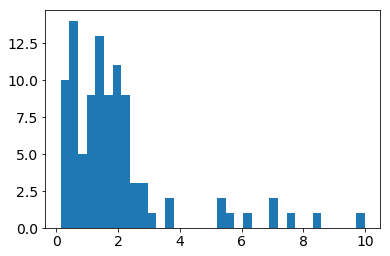

In [7]:
hist, Mbins, _ = plt.hist(M_mass, bins=35)

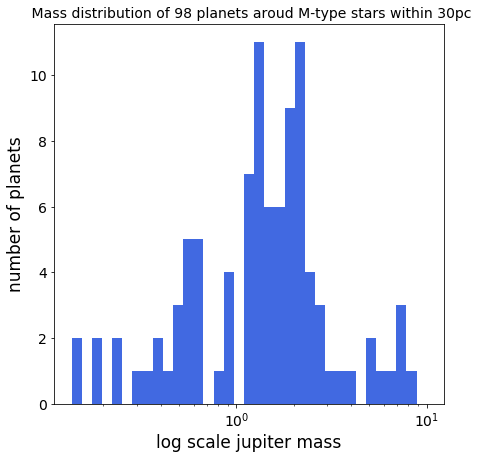

In [8]:
plt.figure(figsize=(7,7))

Mlogbins = np.logspace(np.log10(Mbins[0]),np.log10(Mbins[-1]),len(Mbins))
plt.hist(M_mass,bins=Mlogbins,color="royalblue")
plt.gca().set_xscale("log")

plt.xlabel('log scale jupiter mass')
plt.ylabel('number of planets')
plt.title(' Mass distribution of %d planets aroud M-type stars within 30pc' %M_len)

plt.savefig('M-type.png')

In [9]:
#for i in FGKspec, if == 0 then means it contains str 'F'
#in other word, its F-type
strF = 'F'
strG = 'G'
strK = 'K'
FGKspec = []
for s in planet_spec:
    F = s.find(strF)
    G = s.find(strG)
    K = s.find(strK)
    FGKspec.append(F&G&K)

#convert to array
FGKspec = np.array(FGKspec)
#get the index of all the planets around FGK stars
FGK_id = np.where(FGKspec==0)

#use the indexing to extract mass for all the planets around FGK stars
FGK_mass = [masses[i] for i in FGK_id][0]

FGK_len = len(FGK_mass)
print(len(FGK_mass))

#change mass to jupiter mass
FGK_mass = FGK_mass.value/317.82


932


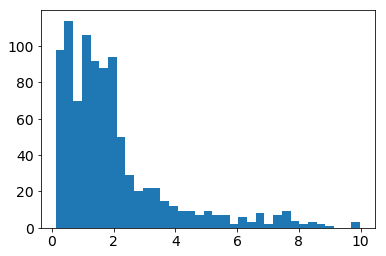

In [10]:
hist, FGKbins, _ = plt.hist(FGK_mass, bins=35)

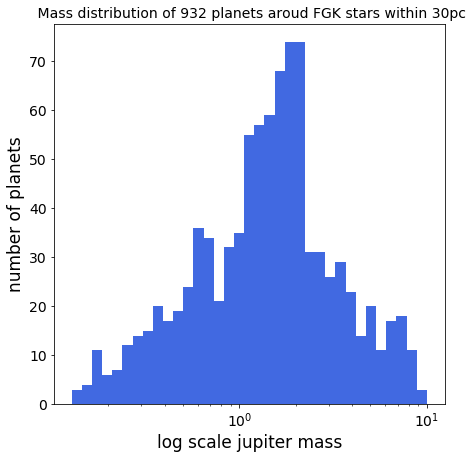

In [11]:
plt.figure(figsize=(7,7))
FGKlogbins = np.logspace(np.log10(FGKbins[0]),np.log10(FGKbins[-1]),len(FGKbins))
plt.hist(FGK_mass,bins=FGKlogbins,color="royalblue")
#plt.xlim(0,10000)
plt.gca().set_xscale("log")

plt.xlabel('log scale jupiter mass')
plt.ylabel('number of planets')
plt.title(' Mass distribution of %d planets aroud FGK stars within 30pc'%FGK_len)

plt.savefig('FGK-type.png')

## Temperature of planets due to star

In [12]:
#define some variables
star_name = SU.TargetList.Name.astype(str)
star_mag = SU.TargetList.MV
albedo = SU.p

#star luminsity in terms of ln(sun lum)
star_lum = SU.TargetList.L

#define distance of the planets form their host star
d = SU.d
dist = d.to(u.m)

#define solar luministy in terms of watt
solar_lum = 3.828E26

#change the lum unit to Watt
star_lum_W = []
for i in star_lum:
    lum = solar_lum*(np.e**i)
    star_lum_W.append(lum)
    
#assign each palent the lum of its star
planet_star_lum = np.array([star_lum_W[i] for i in SU.plan2star])

#extract the planets around FGK stars for their corresponding star lum
FGKstar_lum = [planet_star_lum[i] for i in FGK_id][0]
Mstar_lum = [planet_star_lum[i] for i in M_id][0]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


In [13]:
#use the indexing to extract distant and albedo for all the planets around FGK stars
FGK_dist = [dist[i] for i in FGK_id][0]
FGK_albedo = [albedo[i] for i in FGK_id][0]

#use the indexing to extract distant adn albedo for all the planets around M stars
M_dist = [dist[i] for i in M_id][0]
M_albedo = [albedo[i] for i in M_id][0]

#### Temp for planets around FGK stars

In [14]:
#define Stefan-Boltzman constant
sigma = 5.6704E-8

#caculate the tempurature in K
FGK_T = np.power((1-FGK_albedo)*FGKstar_lum/(16.*np.pi*(FGK_dist**2.)*sigma),1./4)
#change astropy unit to floats
FGK_Temp = FGK_T.value

#limt the range of the temperature to get rid of the extremes
Temp_FGK = []
for i in FGK_Temp:
    if i < 2500:
        Temp_FGK.append(i)
        
FGK_len_new = len(Temp_FGK)

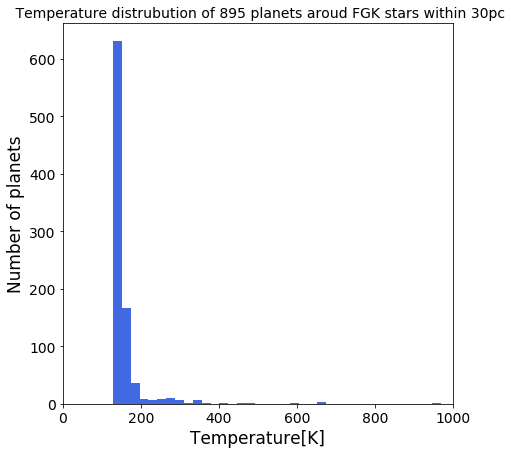

In [15]:
plt.figure(figsize=(7,7))

hist, FGK_Tbins, _ = plt.hist(Temp_FGK, bins=70,color="royalblue")
plt.xlim(0,1000)
plt.xlabel('Temperature[K]')
plt.ylabel('Number of planets')
plt.title(' Temperature distrubution of %d planets aroud FGK stars within 30pc'%FGK_len_new)

plt.savefig('FGK-T.png')

Text(0.5,1,' Temperature distribution of 895 planets aroud FGK type star within 30pc')

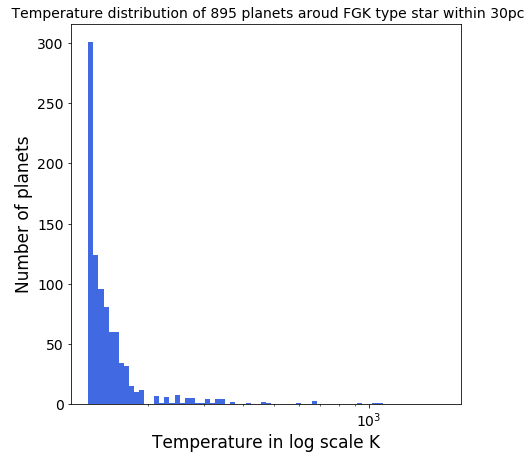

In [16]:
plt.figure(figsize=(7,7))

FGK_Tlogbins = np.logspace(np.log10(FGK_Tbins[0]),np.log10(FGK_Tbins[-1]),len(FGK_Tbins))
plt.hist(Temp_FGK,bins=FGK_Tlogbins,color="royalblue")
plt.gca().set_xscale("log")

plt.xlabel('Temperature in log scale K')
plt.ylabel('Number of planets')
plt.title(' Temperature distribution of %d planets aroud FGK type star within 30pc'%FGK_len_new)

#### Temp for planets around FGK stars

In [17]:
#caculate the tempurature in K
M_T = np.power((1-M_albedo)*Mstar_lum/(16.*np.pi*(M_dist**2.)*sigma),1./4)
#change astropy unit to floats
M_Temp = M_T.value

#limt the range of the temperature to get rid of the extremes
Temp_M = []
for i in M_Temp:
    if i < 2500:
        Temp_M.append(i)
        
M_len_new = len(Temp_M)

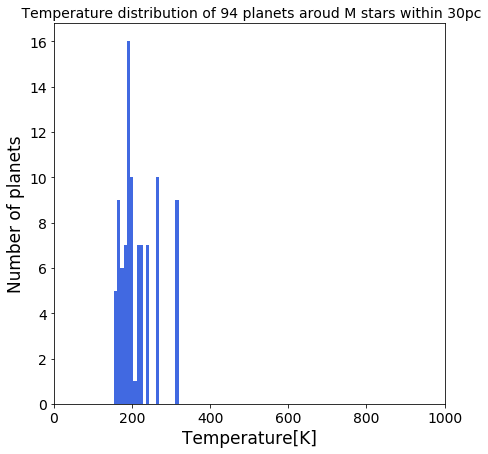

In [18]:
plt.figure(figsize=(7,7))

hist, M_Tbins, _ = plt.hist(Temp_M, bins=20,color="royalblue")
plt.xlim(0,1000)
plt.xlabel('Temperature[K]')
plt.ylabel('Number of planets')
plt.title(' Temperature distribution of %d planets aroud M stars within 30pc'%M_len_new)

plt.savefig('M-T.png')

Text(0.5,1,' Temperature distribution of 94 planets aroud M type star within 30pc')

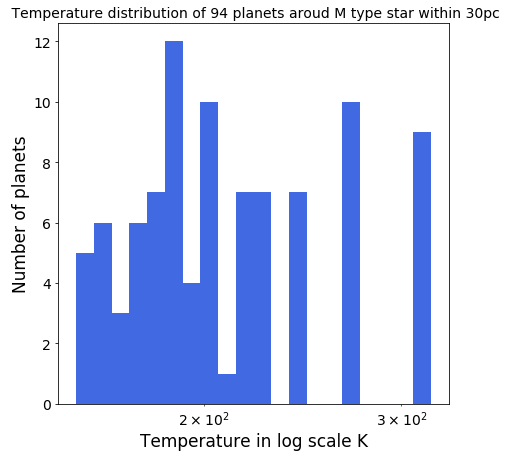

In [19]:
plt.figure(figsize=(7,7))

M_Tlogbins = np.logspace(np.log10(M_Tbins[0]),np.log10(M_Tbins[-1]),len(M_Tbins))
plt.hist(Temp_M,bins=M_Tlogbins,color="royalblue")
plt.gca().set_xscale("log")

plt.xlabel('Temperature in log scale K')
plt.ylabel('Number of planets')
plt.title(' Temperature distribution of %d planets aroud M type star within 30pc'%M_len_new)

### Planet distance vs temperature

In [20]:
#change the distance unit to AU
FGK_AU = FGK_dist.to(u.AU)
M_AU = M_dist.to(u.AU)

Text(0.5,1,'Temperature-Distance of 895 planets aroud M type star within 30pc')

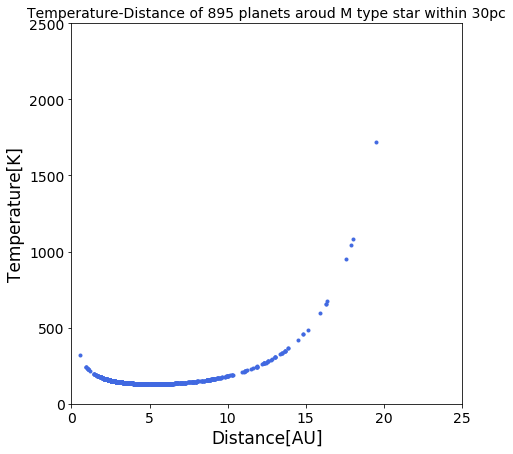

In [21]:
plt.figure(figsize=(7,7))


plt.errorbar(FGK_AU, FGK_Temp,fmt= '.' ,c='royalblue')
plt.ylim(0,2500)
plt.xlim(0,25)

plt.xlabel('Distance[AU]')
plt.ylabel('Temperature[K]')
plt.title('Temperature-Distance of %d planets aroud M type star within 30pc'%FGK_len_new)

Text(0.5,1,'Temperature-Distance of 895 planets aroud M type star within 30pc')

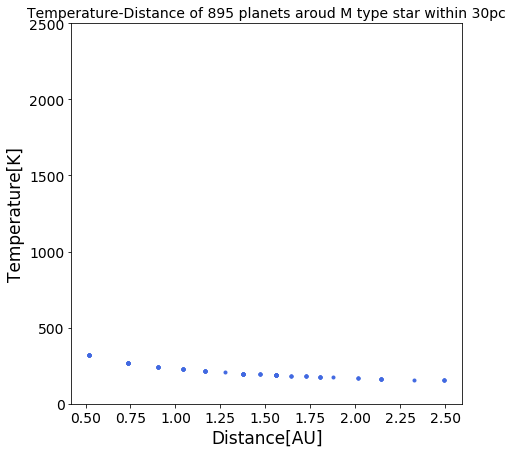

In [22]:
plt.figure(figsize=(7,7))

plt.errorbar(M_AU, M_Temp,fmt= '.' ,c='royalblue')
plt.ylim(0,2500)

plt.xlabel('Distance[AU]')
plt.ylabel('Temperature[K]')
plt.title('Temperature-Distance of %d planets aroud M type star within 30pc'%FGK_len_new)

### Age of the Stars

In [27]:
# an assumed proper range of star ages within 80pc would be 1.5Gyr~12Gyr
# this range is from Cignoni_et_al.(2006)
nPlans = SU.nPlans
star_age = np.random.uniform(1.5e+09,12e+09,size=nPlans)

#use the indexing to extract age for all the planets around M stars
M_age = [star_age[i] for i in M_id][0]

#use the indexing to extract age for all the planets around FGK stars
FGK_age = [star_age[i] for i in FGK_id][0]

### Hot Start Gas Giants Mass-Temp-Age

In [28]:
#import the data from Forteny_et_al.2008 
#Mj=1
age1 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07])
temp1 = np.array([900.3,747.5,644.2,554.6])
#Mj=2
age2 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07])
temp2 = np.array([1266.7,1048.8,855.3,710.3,605.8,512.9])
#Mj=4
age4 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07,1.000e+08])
temp4 = np.array([1657.0,1432.0,1207.6,989.1,805.3,673.8,574.6])
#Mj=6
age6 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07,1.000e+08,2.154e+08])
temp6 = np.array([1984.0,1720.9,1464.2,1219.6,988.4,803.5,674.9,574.9])
#Mj=8
age8 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07,1.000e+08,2.154e+08,4.642e+08])
temp8 = np.array([2184.9,1987.6,1656.0,1400.7,1163.4,940.0,769.1,659.2,543.2])
#Mj=10
age10 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07,1.000e+08,2.154e+08,4.642e+08,1.000e+09])
temp10 = np.array([2315.7,2168.4,1873.0,1553.8,1307.0,1072.7,871.5,735.9,614.5,498.2])

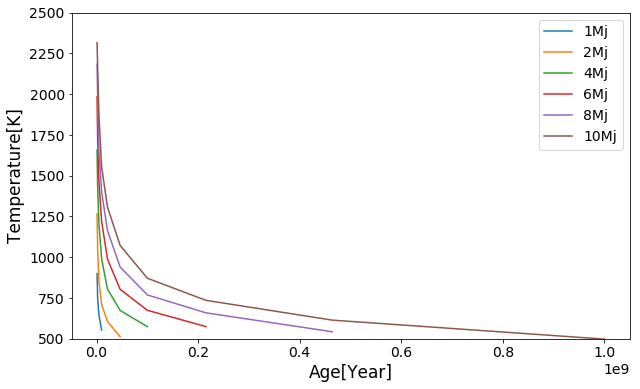

In [29]:
plt.figure(figsize=(10,6))

plt.ylim(500,2500)
plt.ylabel('Temperature[K]')
plt.xlabel('Age[Year]')

plt.plot(age1,temp1,label='1Mj')
plt.plot(age2,temp2,label='2Mj')
plt.plot(age4,temp4,label='4Mj')
plt.plot(age6,temp6,label='6Mj')
plt.plot(age8,temp8,label='8Mj')
plt.plot(age10,temp10,label='10Mj')

plt.legend()

#### Fit in functions for the model for FGK stars

In [30]:
#transfer the log functions to linear functions and perform fit
def log(x):
    return np.log10(x)

def linearfit(x,y):
    return np.polyfit(log(x),log(y),1)

FGK_logage = log(FGK_age)

In [31]:
#get the indexing of the mass range in FGK planet array
Mj1_id = np.where(np.where(FGK_mass<=1.0,FGK_mass,FGK_mass>0))
Mj2_id = np.where(np.where(FGK_mass<=3.,FGK_mass,FGK_mass>1.0))
Mj4_id = np.where(np.where(FGK_mass<=5.,FGK_mass,FGK_mass>3.0))
Mj6_id = np.where(np.where(FGK_mass<=7.,FGK_mass,FGK_mass>5.))
Mj8_id = np.where(np.where(FGK_mass<=9.,FGK_mass,FGK_mass>7.))
Mj10_id = np.where(np.where(FGK_mass<=10.,FGK_mass,FGK_mass>9.))

#the age of the planets in their corresponding mass-range
Mj1_age = [FGK_logage[i] for i in Mj1_id][0]
Mj2_age = [FGK_logage[i] for i in Mj2_id][0]
Mj4_age = [FGK_logage[i] for i in Mj4_id][0]
Mj6_age = [FGK_logage[i] for i in Mj6_id][0]
Mj8_age = [FGK_logage[i] for i in Mj8_id][0]
Mj10_age = [FGK_logage[i] for i in Mj10_id][0]

#the mass-range of the planets
Mj1 = [FGK_mass[i] for i in Mj1_id][0]
Mj2 = [FGK_mass[i] for i in Mj2_id][0]
Mj4 = [FGK_mass[i] for i in Mj4_id][0]
Mj6 = [FGK_mass[i] for i in Mj6_id][0]
Mj8 = [FGK_mass[i] for i in Mj8_id][0]
Mj10 = [FGK_mass[i] for i in Mj10_id][0]

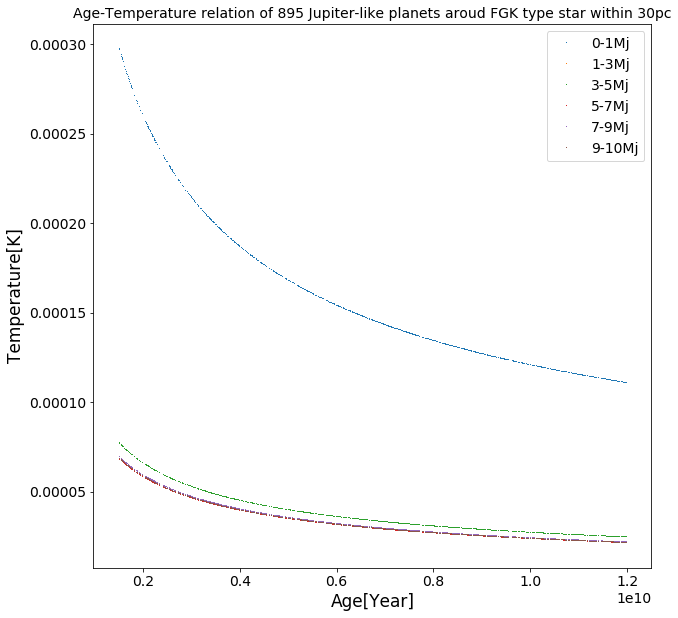

In [41]:
a1,b1 = linearfit(log(age1),log(temp1))
a2,b2 = linearfit(log(age2),log(temp2))
a4,b4 = linearfit(log(age4),log(temp4))
a6,b6 = linearfit(log(age6),log(temp6))
a8,b8 = linearfit(log(age8),log(temp8))
a10,b10 = linearfit(log(age10),log(temp10))

plt.figure(figsize=(10,10))
plt.errorbar(10**Mj1_age,10**(Mj1_age*a1+b1),fmt= ',',label='0-1Mj')
plt.errorbar(10**Mj2_age,10**(Mj2_age*a2+b2),fmt= ',',label='1-3Mj')
plt.errorbar(10**Mj4_age,10**(Mj4_age*a4+b4),fmt= ',',label='3-5Mj')
plt.errorbar(10**Mj6_age,10**(Mj6_age*a6+b6),fmt= ',',label='5-7Mj')
plt.errorbar(10**Mj8_age,10**(Mj8_age*a8+b8),fmt= ',',label='7-9Mj')
plt.errorbar(10**Mj10_age,10**(Mj10_age*a10+b10),fmt= ',',label='9-10Mj')
plt.legend()

#plt.ylim(0.00002,0.00008)
plt.xlabel('Age[Year]')
plt.ylabel('Temperature[K]')
plt.title('Age-Temperature relation of %d Jupiter-like planets aroud FGK type star within 30pc'%FGK_len_new)

plt.savefig('FGK-Age-Temp.png')